In [17]:
import pandas as pd
import numpy as np
import os
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt


vector=CountVectorizer()

#Codigo para probar con base de datos en linea 
#df = pd.read_csv('https://query.data.world/s/2a36e7ctpxaaz2ex7t3oxbmsxebakk')
#df.head()

#code to test in personal pc 

parent_path=os.path.dirname(os.getcwd())
data_path=parent_path+"/desktop/torre/reed_uk.csv"

df_raw=pd.read_csv(data_path)
df_raw=df_raw.head(500)


##Categorization

#Look for similar category jobs, for this I would be look for similar descriptions
#I will clean the job description in order to vectorizer it and then i am planning to use k-hoods  in order to find
#job tittles with similar descriptions 

#function who cleans the text 
def clean(x):
    x=x.replace("apply"," ")
    x=x.replace("now"," ")
    x=x.replace("are"," ")
    x=x.replace("you"," ")
    x=x.replace("this"," ")
    x=x.replace("role"," ")
    x=x.replace("and"," ")
    x=x.replace("job"," ")
    x=x.replace("description"," ")
    x=x.replace("then","")
    x=x.replace("to"," ")
    x=x.replace("in"," ")
    x=x.replace("  "," ")
    x=x.strip()
    return x


def vect_description(txt):
    result = list(map(clean, txt))
    vector.fit(result)
    vector_count = vector.transform(txt)
    return pd.DataFrame(vector_count.sum(0), columns=vector.get_feature_names())


def v_text():  
    #ddf = pd.DataFrame([""],columns=["JOB__TITLE"])
    ddf = pd.DataFrame()
    for idx,description in enumerate(df_raw["job_description"]):
        txt = [description]
        ddf = pd.concat([ddf,vect_description(txt)],ignore_index=True)     
        #ddf["JOB__TITLE"][idx+1]=df_raw["job_title"][idx]
    return ddf


result=v_text().replace(np.nan,0)

result


,2006,30,45,ability,accord,act,agencies,all,allowance,an,...,vertas,acquisitive,ascend,broader,burgeon,chemicals,mang,sit,sr,pilsworth
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

from sklearn.cluster import KMeans


cjv=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i, max_iter=400)
    kmeans.fit(result)
    cjv.append(kmeans.inertia_)
    
plt.plot(range(1,30),cjv)
plt.title("codo de jambu")
plt.xlabel("numero de clusters")
plt.ylabel("cjv")

In [21]:
khood=KMeans(n_clusters=6,max_iter=400)
khood.fit(result)

KMeans(max_iter=400, n_clusters=6)

In [22]:
df_raw["Cluster"]=khood.labels_

df_raw.head()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state,Cluster
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon,2
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire,5
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia,5
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex,5
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England,4


In [23]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_description=pca.fit_transform(result)
pca_description_df=pd.DataFrame(data=pca_description,columns=["component 1","component 2"])
pca_description_df=pd.concat([pca_description_df,df_raw["Cluster"]],axis=1)

pca_description_df

,component 1,component 2,Cluster
0,-0.591545,3.449098,2
1,-5.567548,1.198259,5
2,-3.387525,-5.880268,5
3,-13.111062,-1.455355,5
4,9.604482,7.821774,4
...,...,...,...
495,17.321411,-10.026321,3
496,-1.604209,3.374454,2
497,-3.480425,2.294456,5
498,-8.412032,-0.022265,5


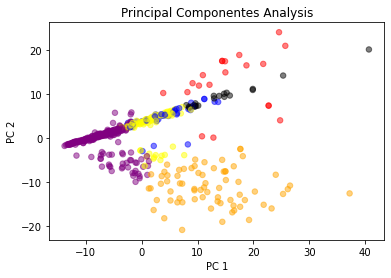

In [25]:


color_theme=np.array(["blue","red","yellow","orange","black","purple"])
x=pca_description_df["component 1"]
y=pca_description_df["component 2"]
colors=color_theme[pca_description_df["Cluster"]]
              
plt.scatter(x, y, s=30, c=colors, alpha=0.5)
plt.title('Principal Componentes Analysis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

                
